# Project: Investigation of TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data at first glance">Data at first glance</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This sheet purpose is to investigate tmdb database by trying to answer into two questions:  
 - Does bigger budget gives better movie revenue?  
 - Does higher vote_average shows better film popularity and  better revenue??
 
In order to answer these question we will use jupyter notebook together with pandas, numpy, seaborn and mathplotlib python pacakges. First we will start by importing packages and reading a dataset. Then we'll go through wrangling step where will be prepared for our investigation. After this we will try to answer these questons each of one separately using calculations and visualisations of data.


<a id='Data at first glance'></a>
## Data at first glance

In [1]:
# Importing python packages. Numpy and pandas are required for computing calulations and data wrangling, 
# where others are required for visusalisations.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Loading tmdb-movies dataset. by setting encoding anad separator for making sure that data is loaded correctly. 
# Last line prints out last two lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
# In order to get information about column data types totoal number of rows and missing values, info method was used.
# This information is going to be used for the next step.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning  
Looking to the last we can identify these problems:
 - Release_data and release_year are recognized as numeric data type rather than date type;
 - There are empyt values in columns: imdb_id, cast, hoempage, director, tagline, keywords, overview, genres, production_companies;
 
We will solve these issues in the next step. But first we will drop columns that we don't need for our analysis, then apply fixes for the issues that was mentioned before. Lastly just to be safe from errors, we will check duplicated rows and trim string columns.

In [3]:
# Removing columns which are not useful for this investigation.
df.drop(['director', 'production_companies', 'homepage', 'tagline', 'overview', 'genres','keywords', 'cast', 'imdb_id', 'id'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Check for information about each columns. As we can see wee don't need to fill data,
# because there aren't no missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [5]:
# Changing release_year and release_date data types to datetime. This will make our analysis easier if we will need
# date values.
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['release_date'] = pd.to_datetime(df['release_date'])
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null datetime64[ns]
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 933.9+ KB


In [6]:
# Making sure that everythin is ok, let's print first 5 lines of dataset.
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09


In [7]:
# Check and, if there are, print all duplicated rows.
df_dupl = df[df.duplicated(keep=False)]
df_dupl.head(len(df_dupl.index))

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,30000000,967000,TEKKEN,92,2010-03-20,110,5.0,2010-01-01,30000000.0,967000.0
2090,0.59643,30000000,967000,TEKKEN,92,2010-03-20,110,5.0,2010-01-01,30000000.0,967000.0


In [8]:
# Delete duplicated values to prevent bad statistical results.
df.drop_duplicates(inplace=True)

In [9]:
# Strip whitespace (including newlines) from each string in the Series/Index from left and right sides.
df_ob = df.select_dtypes(['object'])
df[df_ob.columns] = df_ob.apply(lambda x: x.str.strip())

<a id='eda'></a>
## Exploratory Data Analysis

### Does bigger budget gives better movie revenue?

In [10]:
# Lets see basic statistical information about each column.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


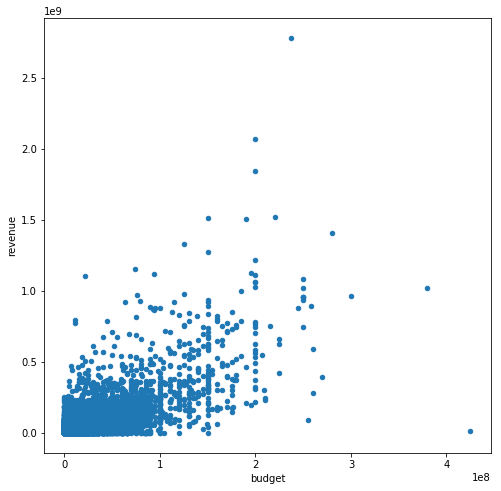

In [72]:
# Let's plot visualization about budget revenue. This might indicate some kind of coorelation.
df.plot(x='budget', y='revenue', kind='scatter', figsize=(8, 8));

In [12]:
# Looking to the plot we can see that it might be a strong positive correlation between these values.
# Let's calculate coorelation index. As we will index also shows a stron positive correlation.
round(df['revenue'].corr(df['budget']), 3)

0.735

Looking to the chart and calculations it is clear there is a strong positive correlation between revenue and budget. Next let's see if distribution is similiar between budget and revenue.

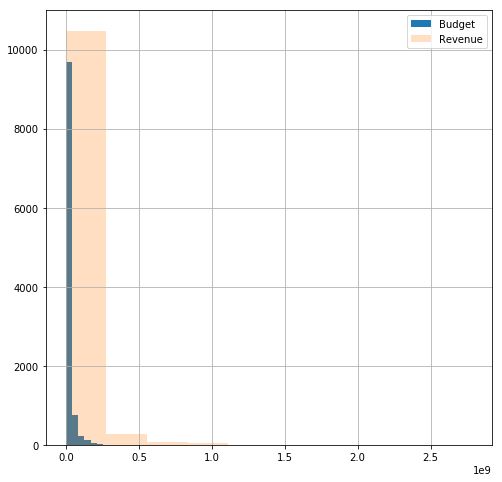

In [13]:
# Looking for the distribution on budget and revenue we will see that it is very similar. 
# Interesting thing is that there are more movies which lower budget but had the same or better revenue as films that had
# bigger budget.
df.budget.hist(alpha=1, label='Budget', figsize=(8, 8))
df.revenue.hist(alpha=0.25, label='Revenue', figsize=(8, 8))
plt.legend();

Data distribution for budget and revenue is very similiar shape. This distribution also shows that even with lower budget films can genarate relitivaly same revenue as bigger budget films.

### Does higher vote_average also indicates a better film revenue or is it shows more about popularity??

Usually votes are the way to express how much audience like specific film, but maybe this value has a relationship with revenue, popularity and total number of votes? We will try to answer by calculation corelations, categorizing ratings into 5 sections based on average ratings: 0-2, 2-4, 4-6, 6-8, 8-10. Then we will look how revenue, popularity and vote counts values are on each category.

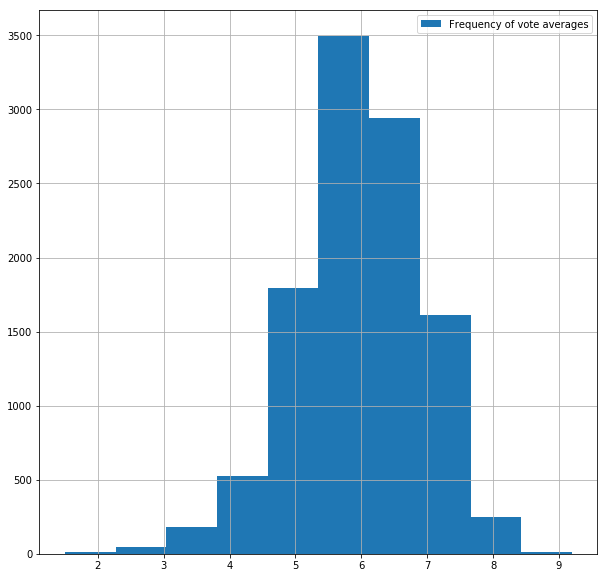

In [73]:
df.vote_average.hist(alpha=1, label='Frequency of vote averages', figsize=(10,10));
plt.legend();

  Looking to the distribution of film averages it is clear that most film has average between 5.2 - 6.1 aproximately. Lets have a look at correlations between vote averages and revenue, popularity and number of votes.

In [15]:
# At fist glance coorelation between votes and revenue is very low.
round(df['vote_average'].corr(df['revenue']), 3)

0.173

In [16]:
# Correlation between vote_averages and popularity
round(df['vote_average'].corr(df['popularity']), 3)

0.21

In [26]:
# Correlation between vote_averages and numebr of votes.
round(df['vote_average'].corr(df['vote_count']), 3)

0.254

As we can see none of all three fields has a strong correlation with average votes. Which means that linear relation betweem fields is very low.
Let's have a look how average revenues looks like on different ranges. To do this, we will slice all votes into 5 sections and draw histograms and lines to visualize the results. 

In [17]:
# Slices data into sections
df02 = df[df['vote_average'].between(0, 2, inclusive=False)]
df24 = df[df['vote_average'].between(2, 4, inclusive=False)]
df46 = df[df['vote_average'].between(4, 6, inclusive=False)]
df68 = df[df['vote_average'].between(6, 8, inclusive=False)]
df810 = df[df['vote_average'].between(8, 10, inclusive=False)]

# Calculate means of revenue on each category
df02_1 = df02['revenue'].mean()
df24_1 = df24['revenue'].mean()
df46_1 = df46['revenue'].mean()
df68_1 = df68['revenue'].mean()
df810_1 = df810['revenue'].mean()

# Calculate means of popularity on each category
df02pop_1 = df02['popularity'].mean()
df24pop_1 = df24['popularity'].mean()
df46pop_1 = df46['popularity'].mean()
df68pop_1 = df68['popularity'].mean()
df810pop_1 = df810['popularity'].mean()

# Calculate means of vote_count on each category
df02vot_1 = df02['vote_count'].mean()
df24vot_1 = df24['vote_count'].mean()
df46vot_1 = df46['vote_count'].mean()
df68vot_1 = df68['vote_count'].mean()
df810vot_1 = df810['vote_count'].mean()

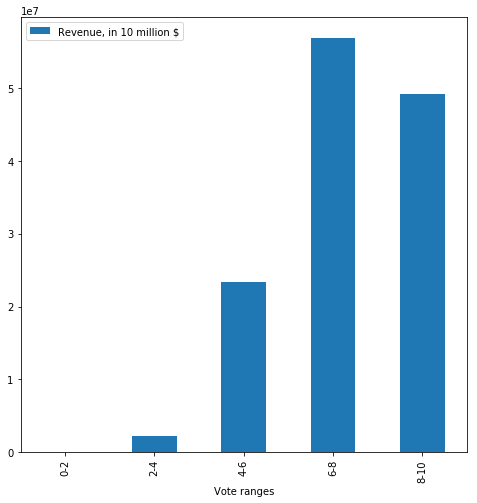

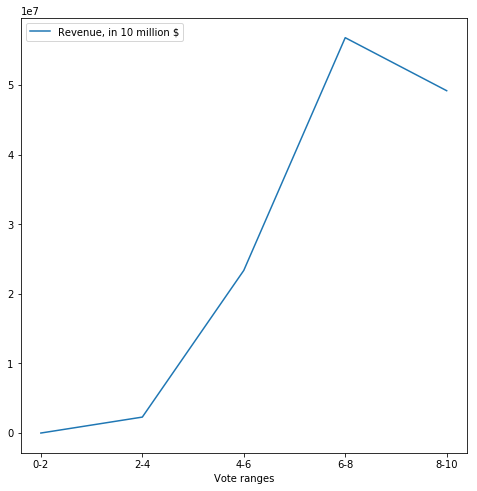

In [146]:
rev_av = [df02_1, df24_1, df46_1, df68_1, df810_1]
df_rev = pd.DataFrame({'Vote ranges':['0-2', '2-4', '4-6', '6-8', '8-10'], 'Revenue, in 10 million $':rev_av}, index=['0-2', '2-4', '4-6', '6-8', '8-10'])
df_rev.plot(x='Vote ranges', kind='bar', figsize=(8, 8))
df_rev.plot.line(x='Vote ranges', figsize=(8, 8));
plt.xticks(np.arange(len(df_rev.index)), df_rev.index);

As we can see average revenue is highsest on films rated from 6-8. However it drops in the highest vote average section. This is happened, because most films are in 6-8 section and and slection 8 - 10 has only a fraction of films. Lets' check this in the next step cell:

In [59]:
print(
    " Number of films in range 0-2: ", len(df02.index), '\n',
    "Number of films in range 2-4:", len(df24.index), '\n',
    "Number of films in range 4-6:", len(df46.index), '\n',
    "Number of films in range 6-8:", len(df68.index), '\n',
    "Number of films in range 8-10:", len(df810.index)
        )

 Number of films in range 0-2:  2 
 Number of films in range 2-4: 269 
 Number of films in range 4-6: 4728 
 Number of films in range 6-8: 5224 
 Number of films in range 8-10: 54


As we can see, hypothesis about number of films can be true. Looking to the amount fo films on each section and revenues bars it is clear that films with highest votes has way more revenue per one film comparing to other films from other sections.

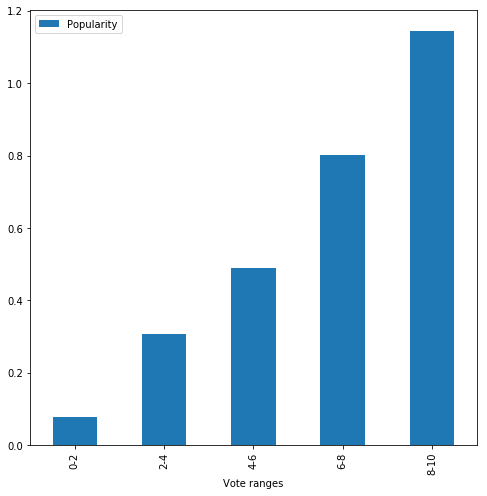

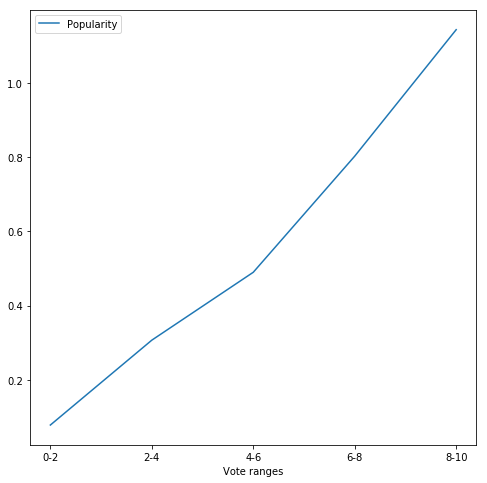

In [150]:
pop_av = [df02pop_1, df24pop_1, df46pop_1, df68pop_1, df810pop_1]
df_pop = pd.DataFrame({'Vote ranges':['0-2', '2-4', '4-6', '6-8', '8-10'], 'Popularity':pop_av}, index=['0-2', '2-4', '4-6', '6-8', '8-10'])
df_pop.plot(x='Vote ranges', kind='bar', figsize=(8, 8));
df_pop.plot.line(x='Vote ranges', figsize=(8, 8));
plt.xticks(np.arange(len(df_pop.index)), df_pop.index);

When comparing popularity of films, we can see average avaerage popularity is higher rating group is also higher. This could tell us that films with higher average_votes tend to be more popular, but the relationship between these values is not linear.

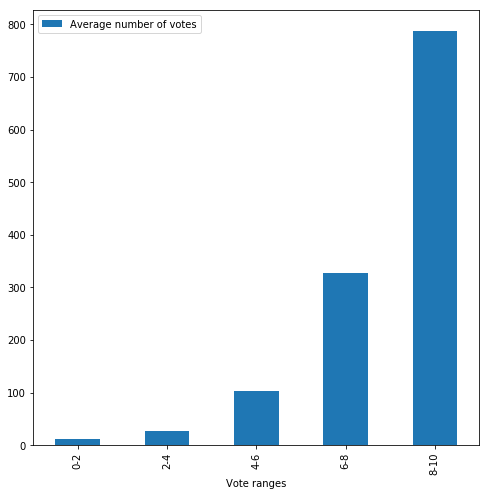

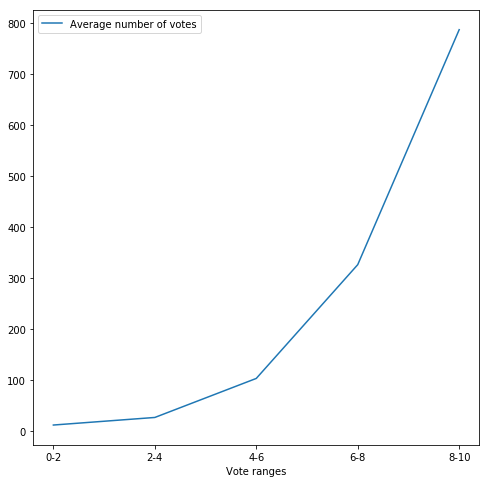

In [151]:
vot_av = [df02vot_1, df24vot_1, df46vot_1, df68vot_1, df810vot_1]
df_vot = pd.DataFrame({'Vote ranges':['0-2', '2-4', '4-6', '6-8', '8-10'], 'Average number of votes':vot_av}, index=['0-2', '2-4', '4-6', '6-8', '8-10'])
df_vot.plot(x='Vote ranges', kind='bar', figsize=(8, 8));
df_vot.plot.line(x='Vote ranges', figsize=(8, 8));
plt.xticks(np.arange(len(df_vot.index)), df_vot.index);

When comparing vote categories, number of votes is increasing. This might mean that people tend vote more when they like film rather than disliking the film. However this statement should checked with additional investigations from different corner.

<a id='conclusions'></a>
## Conclusions

- Budget and revenue strong  positive correlation. This means that, statistically, the higher budget the better revenue is going to be. This teory is also supported by looking to the data distribution of budget and revenue values. However, this conclusion doesn't mean that bigger budget brings more revenue by itself. This answer shows more about productivity of film industry. 
- Average_votes has very low correlation with film revenue and popularity. However when slicing all average votes into 5 different ranges we can see that films with higher average vote tend to have better revenue, popularity and activity on voting. However relations between average vote and revenue, popularity and number of votes is not linear.
- Talking about limitations lack of more data and possibilty of inaccurate data is always are concern. It would nice to have data about film industry from other reliable source and compare the findings. Also dividing average votes into sections is a risk. Sometimes slicing data into differnet number of sections, can influence different conlculsion, because charts and calculations will look different. To overcome this limitation slicing vote_averages two other ways (0-3,3-7,7-10 or 0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10) and comparing results can be an option as well. Lastly, human factor of voting (there are many variables that could influence people to vote in a certain way) and voting by not real people (bots. No evidences wiht tmdb, but this happened in social media.) can make wrong values. 
